In [1]:
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import tensorflow_datasets as tfds
import tensorflow as tf
path = os.path.realpath(os.path.join(os.getcwd(),'../'))
sys.path.insert(0, path)
import astro_datasets

/Users/adammoss/opt/anaconda3/envs/astro_datasets/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ds, info = tfds.load(name='cmd', 
                     split='train', 
                     with_info=True, 
                     as_supervised=True, 
                     builder_kwargs={'simulation': 'Nbody_IllustrisTNG', 'field': 'Mtot', 
                                     'parameters': ['omegam']})

2022-08-16 15:56:04.593470: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
print(info)

tfds.core.DatasetInfo(
    name='cmd',
    full_name='cmd/1.0.3',
    description="""
    The CAMELS Multifield dataset consists of 3 groups indicating the type of simulation used to create the data.IllustrisTNG are magneto-hydrodynamic simulations.SIMBA are hydrodynamic simulations.There are corresponding N-body simulations for each(magneto-)hydrodynamic simulation.
    """,
    homepage='https://camels-multifield-dataset.readthedocs.io/en/latest/index.html',
    data_path='/Users/adammoss/tensorflow_datasets/Nbody_IllustrisTNG_Mtot_omegam/cmd/1.0.3',
    file_format=tfrecord,
    download_size=3.66 GiB,
    dataset_size=3.66 GiB,
    features=FeaturesDict({
        'image': Tensor(shape=(256, 256, 1), dtype=tf.float32),
        'label': Tensor(shape=(1,), dtype=tf.float64),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=15000, num_shards=32>,
    },
    citation="""""",
)


In [4]:
def normalize(image, label):  
    image = tf.math.asinh(image)
    image = image - 26
    return image, label

def resize(image, label, size):
    image = tf.image.resize(image, size=[size, size])
    return image, label

In [5]:
ds = ds.map(lambda image, label: resize(image, label, 128))
ds = ds.map(normalize)

In [6]:
x = np.stack([x for x, y in ds])
print(np.mean(x), np.std(x))

0.24434982 1.1514119


tf.Tensor([0.197], shape=(1,), dtype=float64)


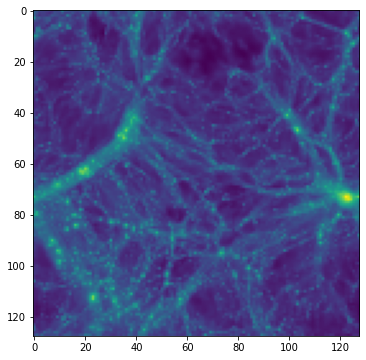

tf.Tensor([0.241], shape=(1,), dtype=float64)


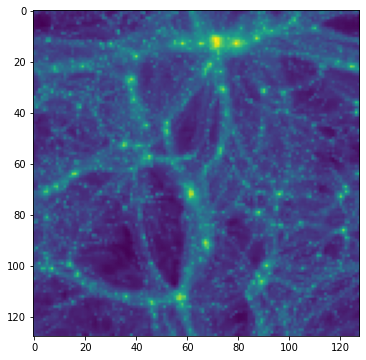

In [7]:
for d in ds.take(2):
    inputs, label = d
    print(label)
    plt.figure(figsize=(6, 6))
    plt.imshow(inputs)
    plt.show()

In [8]:
ds, info = tfds.load(name='cmd', 
                     split='train', 
                     with_info=True, 
                     as_supervised=True, 
                     builder_kwargs={'simulation': 'Nbody_SIMBA', 'field': 'Mtot', 
                                     'parameters': ['omegam']})

In [9]:
print(info)

tfds.core.DatasetInfo(
    name='cmd',
    full_name='cmd/1.0.3',
    description="""
    The CAMELS Multifield dataset consists of 3 groups indicating the type of simulation used to create the data.IllustrisTNG are magneto-hydrodynamic simulations.SIMBA are hydrodynamic simulations.There are corresponding N-body simulations for each(magneto-)hydrodynamic simulation.
    """,
    homepage='https://camels-multifield-dataset.readthedocs.io/en/latest/index.html',
    data_path='/Users/adammoss/tensorflow_datasets/Nbody_SIMBA_Mtot_omegam/cmd/1.0.3',
    file_format=tfrecord,
    download_size=3.66 GiB,
    dataset_size=3.66 GiB,
    features=FeaturesDict({
        'image': Tensor(shape=(256, 256, 1), dtype=tf.float32),
        'label': Tensor(shape=(1,), dtype=tf.float64),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=15000, num_shards=32>,
    },
    citation="""""",
)


In [10]:
ds = ds.map(lambda image, label: resize(image, label, 128))
ds = ds.map(normalize)

tf.Tensor([0.33739999], shape=(1,), dtype=float64)


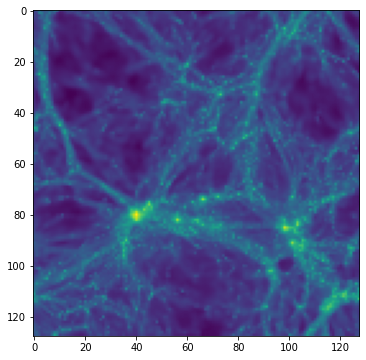

tf.Tensor([0.4686], shape=(1,), dtype=float64)


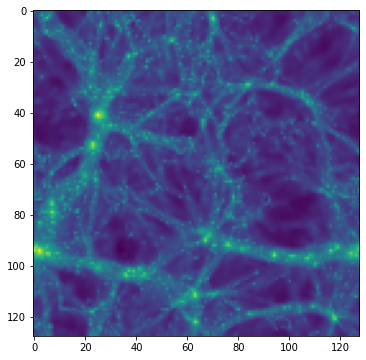

In [11]:
for d in ds.take(2):
    inputs, label = d
    print(label)
    plt.figure(figsize=(6, 6))
    plt.imshow(inputs)
    plt.show()